# **CLASIFICACIÓN 2:**

---

Para este proyecto, realizaremos un modelo de clasificación con el objetivo de predecir si un paciente morirá debido a insuficiencia cardiaca o no en base a ciertas características dadas. Nos apoyaremos nuevamente de la página kaggle.com y usaremos el dataset de nombre "Heart Failure Prediction". Comencemos importando las librerías que usaremos y preprocesando nuestros datos para que estén listos para entrenar nuestro modelo.

---





**Información acerca del Dataset.**

1.   age: age of the patient (years)
2.   anaemia: decrease of red blood cells or hemoglobin (boolean)
1.   creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
2.   diabetes: if the patient has diabetes (boolean)
1.   ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
2.   high blood pressure: if the patient has hypertension (boolean)
1.   platelets: platelets in the blood (kiloplatelets/mL)
2.   sex: woman or man (binary)
1.   serum creatinine: level of serum creatinine in the blood (mg/dL)
2.   serum sodium: level of serum sodium in the blood (mEq/L)
1.   smoking: if the patient smokes or not (boolean)
2.   time: follow-up period (days)

**DEATH_EVENT: if the patient died during the follow-up period (boolean)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carguemos nuestro dataset y veamos de qué manera están distribuidos nuestros datos.

In [ ]:
heart_failure = pd.read_csv('heart_failure_clinical_records.csv')

In [ ]:
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


### **PREPROCESAMIENTO:**

Veamos información acerca de nuestro conjunto de datos. Podemos notar que no hay presencia de datos faltantes en ninguna de las columnas, por lo que no habrá necesidad de imputación.

In [ ]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


Y una descripción estadística de ellos.

In [ ]:
heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


Comenzaremos graficando nuestros datos para conocer más información acerca de su distribución.

<ipython-input-6-0963239cca36>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_failure['age'])


<Axes: xlabel='age', ylabel='Density'>

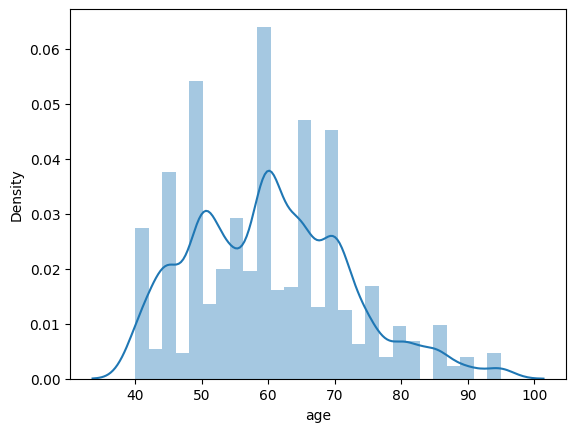

In [ ]:
sns.distplot(heart_failure['age'])

<ipython-input-7-13e7171928b9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='anaemia', data=heart_failure, palette='Set1')


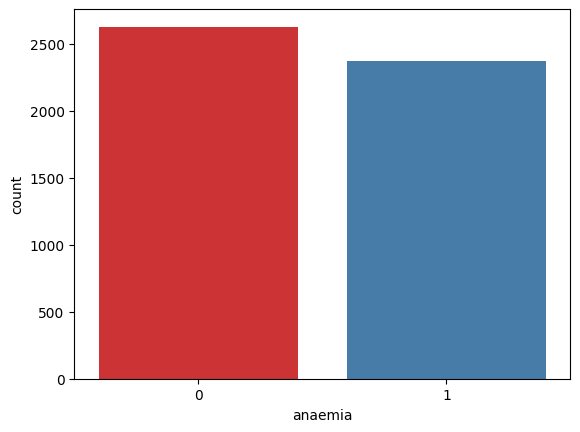

In [ ]:
sns.countplot(x='anaemia', data=heart_failure, palette='Set1')
plt.show()

<ipython-input-8-eaf2a1ab4a52>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=heart_failure, palette='Set1')


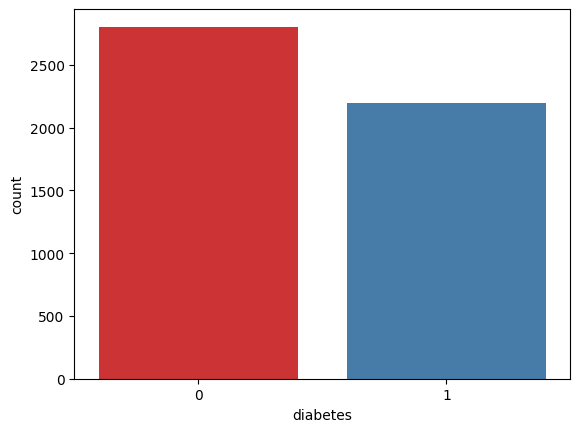

In [ ]:
sns.countplot(x='diabetes', data=heart_failure, palette='Set1')
plt.show()

<ipython-input-9-a9446bf9c318>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='high_blood_pressure', data=heart_failure, palette='Set1')


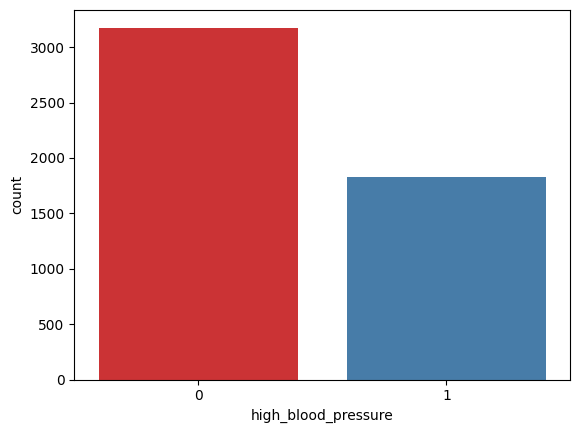

In [ ]:
sns.countplot(x='high_blood_pressure', data=heart_failure, palette='Set1')
plt.show()

<ipython-input-10-22683fb272e9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=heart_failure, palette='Set1')


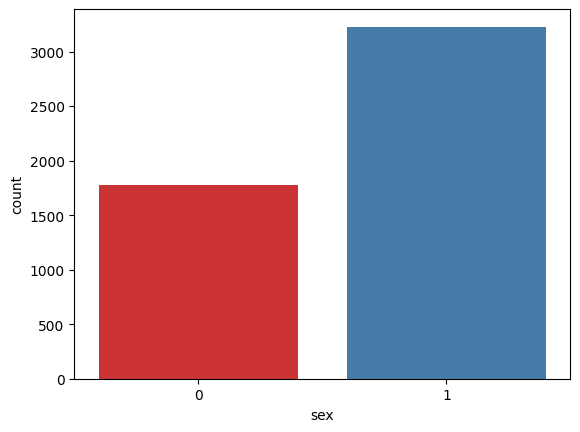

In [ ]:
sns.countplot(x='sex', data=heart_failure, palette='Set1')
plt.show()

<ipython-input-11-6125bc537440>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking', data=heart_failure, palette='Set1')


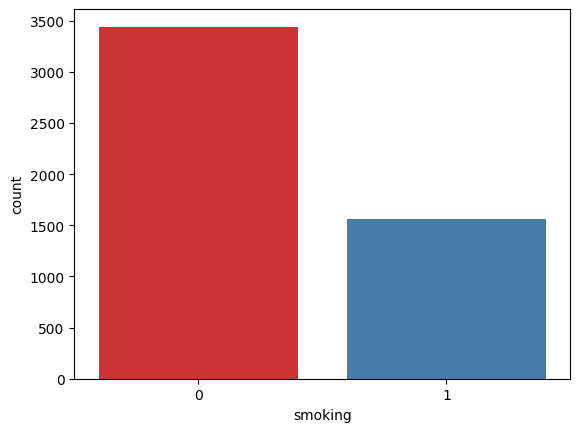

In [ ]:
sns.countplot(x='smoking', data=heart_failure, palette='Set1')
plt.show()

<ipython-input-12-dcdf57fadbbd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEATH_EVENT', data=heart_failure, palette='Set1')


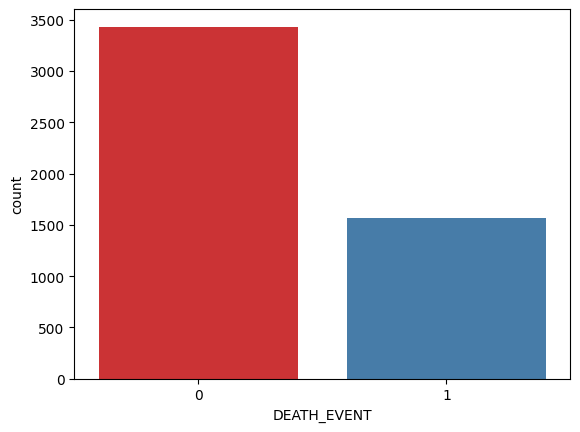

In [ ]:
sns.countplot(x='DEATH_EVENT', data=heart_failure, palette='Set1')
plt.show()

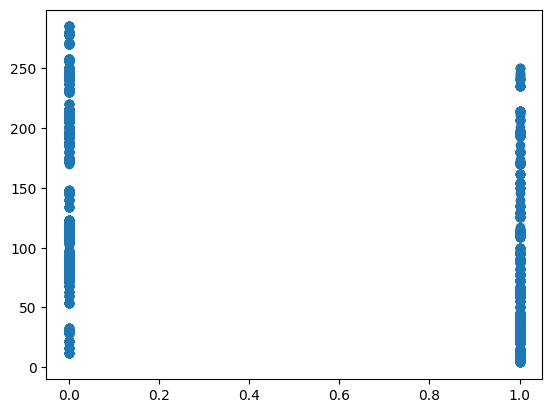

In [ ]:
plt.scatter(heart_failure['DEATH_EVENT'], heart_failure['time'])


Grafiquemos una matriz de correlación para ver la relación entre distintos tipos de datos. Podemos optar por eliminar las columnas que no sugieren existir una gran corelación con la columna DEATH EVENT u optar por dejarlas.

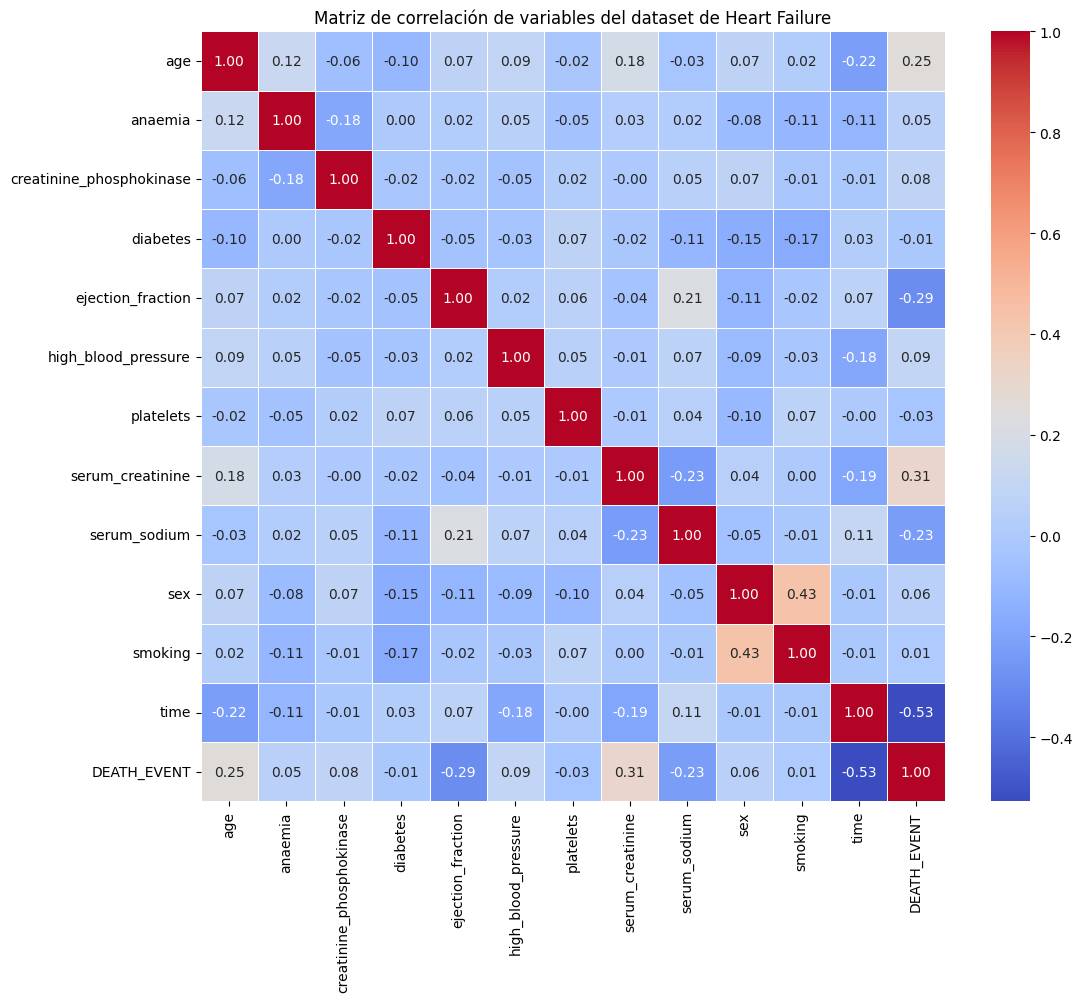

In [ ]:
# Matriz de correlación
corr_matrix = heart_failure.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación de variables del dataset de Heart Failure')
plt.show()

Posteriormente, vamos a normalizar las columnas de tipo numérica. Puesto que las demas columnas son booleanas, no hay necesidad de realizar ninguna técnica de preprocesamiento a ellas.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

heart_failure[columns_to_normalize] = scaler.fit_transform(heart_failure[columns_to_normalize])


In [ ]:
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.272727,0,0.092498,0,0.469697,0,0.288833,0.089888,0.685714,1,1,0.298932,0
1,0.454545,0,0.004210,0,0.166667,0,0.339314,0.505618,0.485714,1,0,0.722420,0
2,0.090909,0,0.071319,1,0.363636,0,0.356286,0.044944,0.771429,0,0,0.854093,0
3,0.363636,1,0.093264,1,0.393939,1,0.367196,0.078652,0.371429,1,0,0.306050,0
4,1.000000,1,0.071319,0,0.242424,0,0.528428,0.168539,0.542857,1,0,0.163701,1


Separamos nuestros datos en características y etiqueta.

In [ ]:
X = heart_failure.drop('DEATH_EVENT', axis=1)
y = heart_failure['DEATH_EVENT']

### **ENTRENAMIENTO:**

Comenzamos separando nuestros datos de entrenamiento y de prueba, posteriormente imprimimos su shape.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X Train: {x_train.shape}")
print(f"X Test: {x_test.shape}")
print(f"Y Train: {y_train.shape}")
print(f"Y Test: {y_test.shape}")

X Train: (4000, 12)
X Test: (1000, 12)
Y Train: (4000,)
Y Test: (1000,)


Probaremos entrenar nuestro modelo con SVM y un Kernel Lineal e imprimimos su score en ambos conjunto de datos.

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
print(f"Training mean accuracy: {round(clf.score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf.score(x_test, y_test),3)}")

Training mean accuracy: 0.862
Test mean accuracy: 0.856


Ahora utilizamos el SVM por default.

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf. fit(x_train, y_train)
print(f"Training mean accuracy: {round(clf. score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf.score(x_test, y_test),3)}")

Training mean accuracy: 0.902
Test mean accuracy: 0.887


Posteriormente utilizamos un Kernel Polinomial.

In [ ]:
clf = SVC(kernel='poly')
clf.fit(x_train, y_train)
print(f"Training mean accuracy: {round(clf. score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf.score(x_test, y_test),3)}")

Training mean accuracy: 0.924
Test mean accuracy: 0.907


Realizaremos una búsqueda de los mejores hiperparámetros bajo el modelo SVM.

In [ ]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 'kernel': ('linear', 'poly', 'rbf'),
              'degree': [1, 2, 3, 4], 'gamma': ('auto', 'scale')}
param_grid

{'C': [0.01, 0.1, 0.5, 1, 10, 100],
 'kernel': ('linear', 'poly', 'rbf'),
 'degree': [1, 2, 3, 4],
 'gamma': ('auto', 'scale')}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = SVC()
gs = GridSearchCV(clf, param_grid)
gs.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100],
                         'degree': [1, 2, 3, 4], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf')})

Imprimimos el score con los mejores hiperparámetros y cuáles son ellos.

In [ ]:
print(f"Best score: {gs.best_score_:.4f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.9708
Best params: {'C': 100, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


Utilizamos el mejor modelo bajo SVM para calcular su precisión y un reporte de clasificación de la liberia Scikit Learn.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

best_params = {'C': 100, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
clf = SVC(**best_params)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.972
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       698
           1       0.94      0.97      0.95       302

    accuracy                           0.97      1000
   macro avg       0.96      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



Graficamos la matriz de confusión de este modelo.

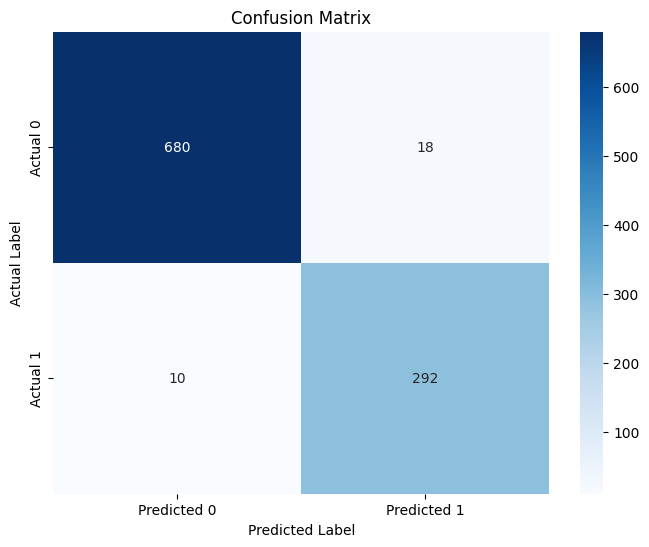

In [ ]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

Posteriormente haremos una búsqueda entre distintos modelos y distintos hiperparámetros para buscar al mejor modelo. Los modelos son: RandomForest, Gradient Boosting y Logistic Regresion. Compararemos la precisión de los mejores hiperparámetros para cada uno de los modelos y su matriz de confusión.

Buscando los mejores parámetros para RandomForest...
Mejores parámetros para RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Mejor exactitud en validación cruzada para RandomForest: 0.9925

Buscando los mejores parámetros para GradientBoosting...
Mejores parámetros para GradientBoosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Mejor exactitud en validación cruzada para GradientBoosting: 0.994

Buscando los mejores parámetros para LogisticRegression...
Mejores parámetros para LogisticRegression: {'C': 1, 'solver': 'liblinear'}
Mejor exactitud en validación cruzada para LogisticRegression: 0.85275

Evaluando RandomForest en el conjunto de prueba...
Exactitud para RandomForest: 0.994
Reporte de clasificación para RandomForest:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       698
           1       0.98      1.00      0.99       302

    accuracy                           0.99      1000

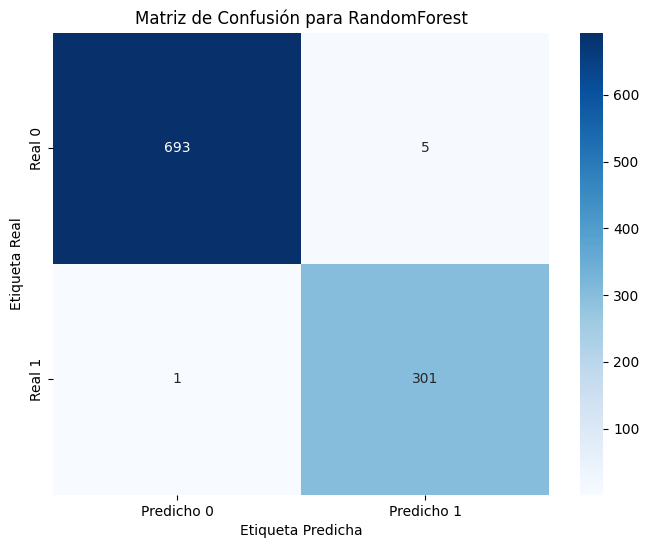

Evaluando GradientBoosting en el conjunto de prueba...
Exactitud para GradientBoosting: 0.993
Reporte de clasificación para GradientBoosting:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       698
           1       0.98      0.99      0.99       302

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000




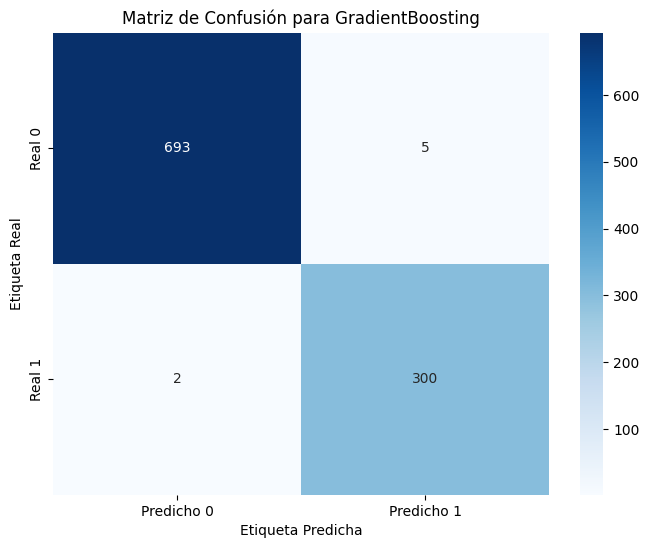

Evaluando LogisticRegression en el conjunto de prueba...
Exactitud para LogisticRegression: 0.853
Reporte de clasificación para LogisticRegression:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       698
           1       0.77      0.73      0.75       302

    accuracy                           0.85      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.85      0.85      0.85      1000




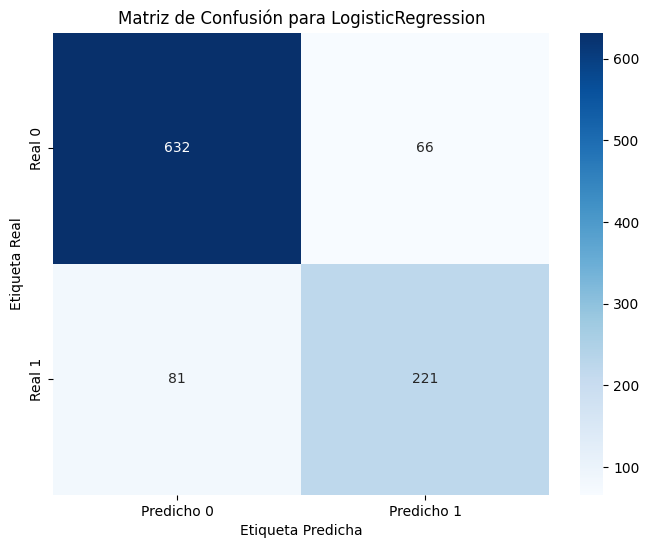

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


# Definir los modelos y sus hiperparámetros
modelos = [
    {
        'nombre': 'RandomForest',
        'modelo': RandomForestClassifier(),
        'parametros': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'nombre': 'GradientBoosting',
        'modelo': GradientBoostingClassifier(),
        'parametros': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    {
        'nombre': 'LogisticRegression',
        'modelo': LogisticRegression(max_iter=1000),
        'parametros': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']
        }
    }
]

# Buscar los mejores modelos
mejores_estimadores = []
for modelo in modelos:
    print(f"Buscando los mejores parámetros para {modelo['nombre']}...")
    busqueda = GridSearchCV(modelo['modelo'], modelo['parametros'], cv=5, n_jobs=-1, scoring='accuracy')
    busqueda.fit(x_train, y_train)
    mejores_estimadores.append({
        'nombre': modelo['nombre'],
        'mejor_estimador': busqueda.best_estimator_,
        'mejores_parametros': busqueda.best_params_,
        'mejor_score': busqueda.best_score_
    })
    print(f"Mejores parámetros para {modelo['nombre']}: {busqueda.best_params_}")
    print(f"Mejor exactitud en validación cruzada para {modelo['nombre']}: {busqueda.best_score_}\n")

# Evaluar los mejores modelos en el conjunto de prueba
for mejor_est in mejores_estimadores:
    print(f"Evaluando {mejor_est['nombre']} en el conjunto de prueba...")
    y_pred = mejor_est['mejor_estimador'].predict(x_test)
    print(f"Exactitud para {mejor_est['nombre']}: {accuracy_score(y_test, y_pred)}")
    print(f"Reporte de clasificación para {mejor_est['nombre']}:\n{classification_report(y_test, y_pred)}\n")

    # Calcular la matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)

    # Visualizar la matriz de confusión usando un heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicho 0', 'Predicho 1'], yticklabels=['Real 0', 'Real 1'])
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.title(f'Matriz de Confusión para {mejor_est["nombre"]}')
    plt.show()


Concluimos que para nuestro dataset el mejor modelo fue RandomForest con una precisión del 0.994